**Import and setup**


In [1]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/CA683 Assignment')

Mounted at /content/drive


**Import dataset**

Import the dataset and print the top 3 rows to check it imported correctly and to see what the data looks like

In [21]:
df = pd.read_csv('cincinnati_traffic_crash_data__cpd.csv')
df.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY,...,LOCALREPORTNO,MANNEROFCRASH,ROADCONDITIONSPRIMARY,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,ZIP,UNITTYPE
0,19,63XX GRACELY,39.107808,-84.688195,31-40,SAYLER PARK,SAYLER PARK,06/17/2014 05:25:00 PM,03 - T-INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,145004877,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",SAYLER PARK,D - DRIVER,1 - CLEAR,45233.0,03 - MID SIZE
1,20,9XX CHATEAU AV,39.108110,-84.560280,18-25,EAST PRICE HILL,EAST PRICE HILL,02/15/2015 03:00:00 PM,01 - NOT AN INTERSECTION,2 - INJURY,...,155002081,1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",EAST PRICE HILL,O - OCCUPANT,1 - CLEAR,45204.0,02 - COMPACT
2,21,30XX READING RD,39.135486,-84.496520,18-25,AVONDALE,AVONDALE,07/23/2015 11:54:00 PM,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,155010090,"7 - SIDESWIPE, SAME DIRECTION",01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",AVONDALE,O - OCCUPANT,1 - CLEAR,45206.0,04 - FULL SIZE


**Check the integrity of the data**

We discover the crash location and gender have less values than other columns

In [7]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 227559 entries, 0 to 258671
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LOCATION           227559 non-null  object 
 1   DAYOFWEEK          227559 non-null  object 
 2   GENDER             227559 non-null  object 
 3   INJURIES           227559 non-null  float64
 4   LIGHTCONDITIONS    227559 non-null  object 
 5   ROADCONDITIONS     227559 non-null  object 
 6   ROADCONTOUR        227559 non-null  object 
 7   ROADSURFACE        227559 non-null  object 
 8   SNA_NEIGHBORHOOD   227559 non-null  object 
 9   TYPEOFPERSON       227559 non-null  object 
 10  WEATHER            227559 non-null  object 
 11  UNITTYPE           227559 non-null  object 
 12  LOCATIONF          227559 non-null  int64  
 13  GENDERF            227559 non-null  int64  
 14  LIGHTCONDITIONSF   227559 non-null  int64  
 15  ROADCONDITIONSF    227559 non-null  int64  
 16  RO

**Remove columns that we do not need**

In [22]:
df = df.drop(labels=['Unnamed: 0', 'ADDRESS_X', 'LATITUDE_X', 'LONGITUDE_X', 'DATECRASHREPORTED', 'INSTANCEID', 'LOCALREPORTNO', 'INSTANCEID', 'CRASHSEVERITY', 'CRASHSEVERITYID', 'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'ZIP', 'CPD_NEIGHBORHOOD', 'MANNEROFCRASH'], axis=1)
df.head(3)

,AGE,CRASHDATE,CRASHLOCATION,DAYOFWEEK,GENDER,INJURIES,LIGHTCONDITIONSPRIMARY,ROADCONDITIONSPRIMARY,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,UNITTYPE
0,31-40,06/17/2014 05:25:00 PM,03 - T-INTERSECTION,TUE,F - FEMALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",SAYLER PARK,D - DRIVER,1 - CLEAR,03 - MID SIZE
1,18-25,02/15/2015 03:00:00 PM,01 - NOT AN INTERSECTION,SUN,F - FEMALE,3 - NON-INCAPACITATING,1 - DAYLIGHT,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",EAST PRICE HILL,O - OCCUPANT,1 - CLEAR,02 - COMPACT
2,18-25,07/23/2015 11:54:00 PM,01 - NOT AN INTERSECTION,THU,F - FEMALE,1 - NO INJURY / NONE REPORTED,4 - DARK - LIGHTED ROADWAY,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",AVONDALE,O - OCCUPANT,1 - CLEAR,04 - FULL SIZE


**Tidy up**

In [23]:
df['INJURIES'] = df['INJURIES'].replace(['1 - NO INJURY / NONE REPORTED','5 - NO APPARENTY INJURY'], 0)
df['INJURIES'] = df['INJURIES'].replace(['3 - NON-INCAPACITATING', '4 - POSSIBLE INJURY',
       '3 - SUSPECTED MINOR INJURY', '2 - POSSIBLE', '4 - INCAPACITATING',
       '2 - SUSPECTED SERIOUS INJURY', '5 - FATAL', '1 - FATAL'], 1)

# Chane two cell values with other to UNKNOWN
df['ROADSURFACE'] = df['ROADSURFACE'].replace(['6 - OTHER', '9 - OTHER'],'UNKNOWN')

# Fix the other columns by stripping out the number, dash and space and leave the salient information
cols = ['LIGHTCONDITIONSPRIMARY', 'ROADCONDITIONSPRIMARY', 'WEATHER', 'GENDER', 'TYPEOFPERSON', 'UNITTYPE', 'CRASHLOCATION', 'ROADCONTOUR', 'ROADSURFACE']

for col in cols:
  df[col] = df[col].str.split(" - ", 1).str[1]

# Update null values with 'UNKNOWN'
df['ROADSURFACE'].fillna('UNKNOWN', inplace=True)
df['GENDER'].fillna('UNKNOWN', inplace=True)
df['SNA_NEIGHBORHOOD'].fillna('UNKNOWN', inplace=True)
df['CRASHLOCATION'].fillna('UNKNOWN', inplace=True)

# Dropping all rows where INJURIES is nan as INJURIES will be our y value 
df.dropna(subset = ['INJURIES'])

# Dropping all rows in AGE where AGE is unknown
df.drop(df.index[df['AGE'] == 'UNKNOWN'], inplace=True)

# Classify time of crash into 6 categories of 4 hours
df['HOUR'] = pd.DatetimeIndex(df['CRASHDATE']).hour

df = df.drop(labels=['CRASHDATE', 'HOUR'], axis=1) # No longer required, we have information we need

# Renaming so all data fits on screen without scroll
df = df.rename(columns={'CRASHLOCATION': 'LOCATION', 'LIGHTCONDITIONSPRIMARY': 'LIGHTCONDITIONS', 'ROADCONDITIONSPRIMARY': 'ROADCONDITIONS', 'AGE FLOAT': 'AGE'}) 

    
  

**View**


In [ ]:
df.head(1)

,LOCATION,DAYOFWEEK,GENDER,INJURIES,LIGHTCONDITIONS,ROADCONDITIONS,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,UNITTYPE,AGE
0,T-INTERSECTION,TUE,FEMALE,NONE,DAYLIGHT,DRY,STRAIGHT LEVEL,"BLACKTOP, BITUMINOUS, ASPHALT",SAYLER PARK,DRIVER,CLEAR,MID SIZE,35.5


**Convert data to floats for fitting**

To help make the data fit the model here I am using unique to get all unique values in a column and storing them in a list. 

Then creating a new 'float' column which uses the index of the list item so we have a reference to the original value.

In [24]:
location_list = df.LOCATION.unique().tolist()
def Location(x):
  return location_list.index(x)

df['LOCATIONF'] = df['LOCATION'].apply(lambda x: Location(x))

gender_list = df.GENDER.unique().tolist()
def Gender(x):
  return gender_list.index(x)

df['GENDERF'] = df['GENDER'].apply(lambda x: Gender(x))


lightconditions_list = df.LIGHTCONDITIONS.unique().tolist()
def Lightconditions(x):
  return lightconditions_list.index(x)

df['LIGHTCONDITIONSF'] = df['LIGHTCONDITIONS'].apply(lambda x: Lightconditions(x))

roadconditions_list = df.ROADCONDITIONS.unique().tolist()
def Roadconditions(x):
  return roadconditions_list.index(x)

df['ROADCONDITIONSF'] = df['ROADCONDITIONS'].apply(lambda x: Roadconditions(x))

roadcontour_list = df.ROADCONTOUR.unique().tolist()
def Roadcontour(x):
  return roadcontour_list.index(x)

df['ROADCONTOURF'] = df['ROADCONTOUR'].apply(lambda x: Roadcontour(x))

roadsurface_list = df.ROADSURFACE.unique().tolist()
def Roadsurface(x):
  return roadsurface_list.index(x)

df['ROADSURFACEF'] = df['ROADSURFACE'].apply(lambda x: Roadsurface(x))

sna_neighbourhood_list = df.SNA_NEIGHBORHOOD.unique().tolist()
def Snaneighbourhood(x):
  return sna_neighbourhood_list.index(x)

df['SNA_NEIGHBORHOODF'] = df['SNA_NEIGHBORHOOD'].apply(lambda x: Snaneighbourhood(x))

typeofperson_list = df.TYPEOFPERSON.unique().tolist()
def Typeofperson(x):
  return typeofperson_list.index(x)

df['TYPEOFPERSONF'] = df['TYPEOFPERSON'].apply(lambda x: Typeofperson(x))

weather_list = df.WEATHER.unique().tolist()
def Weather(x):
  return weather_list.index(x)

df['WEATHERF'] = df['WEATHER'].apply(lambda x: Weather(x))

unittype_list = df.UNITTYPE.unique().tolist()
def Unittype(x):
  return unittype_list.index(x)

df['UNITTYPEF'] = df['UNITTYPE'].apply(lambda x: Unittype(x))

age_list = df.AGE.unique().tolist()
def Age(x):
  return age_list.index(x)

df['AGEF'] = df['AGE'].apply(lambda x: Age(x))

dayofweek_list = df.DAYOFWEEK.unique().tolist()
def Dayofweek(x):
  return dayofweek_list.index(x)

df['DAYOFWEEKF'] = df['DAYOFWEEK'].apply(lambda x: Dayofweek(x))


df_float = df.copy().drop(labels=['LOCATION', 'GENDER', 'LIGHTCONDITIONS', 'ROADCONDITIONS', 'ROADCONTOUR', 'ROADSURFACE', 'SNA_NEIGHBORHOOD', 'TYPEOFPERSON', 'WEATHER', 'UNITTYPE', 'AGE', 'DAYOFWEEK'], axis=1)

df_float.head(5)

# print('AGE')
# df.AGE.unique()

,INJURIES,LOCATIONF,GENDERF,LIGHTCONDITIONSF,ROADCONDITIONSF,ROADCONTOURF,ROADSURFACEF,SNA_NEIGHBORHOODF,TYPEOFPERSONF,WEATHERF,UNITTYPEF,AGEF,DAYOFWEEKF
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,0,0,1,0,1,1,0,1,1,1
2,0.0,1,0,1,0,0,0,2,1,0,2,1,2
3,0.0,1,1,0,0,0,0,2,0,0,3,2,3
4,0.0,0,1,2,0,0,0,1,0,0,2,0,3


**Split the data**

In [34]:
from sklearn.model_selection import train_test_split

trainingSet, testSet = train_test_split(df_float, test_size=0.30)

**Create training and test dataframes**

In [35]:
train_df = trainingSet
test_df = testSet

**Create x and y train and test set and load x and y values into them**

In [36]:
x_train = train_df.copy().drop(labels=['INJURIES'], axis=1)

y_train = train_df['INJURIES']

x_test = train_df.copy().drop(labels=['INJURIES'], axis=1)

y_test = train_df['INJURIES']

**Explore Data**

In [ ]:
y_train.value_counts()

INJURIES
NONE        151395
1            30652
dtype: int64

**Plot Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


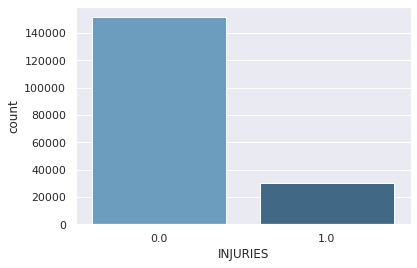

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot('INJURIES', data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

**Get percentages**

In [32]:
print('Percentages of values in INJURIES: ')
df['INJURIES'].value_counts(normalize=True) * 100

Percentages of values in INJURIES: 


0.0    83.189415
1.0    16.810585
Name: INJURIES, dtype: float64

**Look at crashes in wet conditions**

In [ ]:
dfnew = df.loc[(df['ROADCONDITIONS'] == 'DRY') | (df['ROADCONDITIONS'] == 'WATER (STANDING, MOVING)') | (df['ROADCONDITIONS'] == 'WET')]

dfnew.groupby("ROADCONDITIONS").mean()



,INJURIES,AGE
ROADCONDITIONS,,
DRY,0.165613,37.826857
"WATER (STANDING, MOVING)",0.328571,37.860714
WET,0.177942,36.550621


**Gender**

In [ ]:
dfnew = df.loc[(df['GENDER'] == 'MALE') | (df['GENDER'] == 'FEMALE')]

dfnew.groupby("GENDER").mean()

,INJURIES,AGE
GENDER,,
FEMALE,0.197827,36.224668
MALE,0.142902,38.574306


**Model, prediction and score**

Splitting train_test_split with test size of 30% produces the best score

1.   20% split produces a score of 0.8458090493114415 
2.   25% split produces a score of 0.8458185142000012
3.   30% split produces a score of 0.8467647261929425 


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

logreg = LogisticRegression(solver='lbfgs', max_iter=200)

model = logreg.fit(x_train, y_train)

prediction = logreg.predict(x_train)

score = logreg.score(x_test, y_test)
print(score)




0.8467647261929425
